#Upload the CSV

In [1]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


#load and inspect data

In [2]:
import pandas as pd

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Data Cleaning, Preprocessing, EDA & Visualization

#Remove id column

In [3]:
df = df.drop(['id'],axis=1)

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### BMI analysis

<Axes: xlabel='bmi', ylabel='Count'>

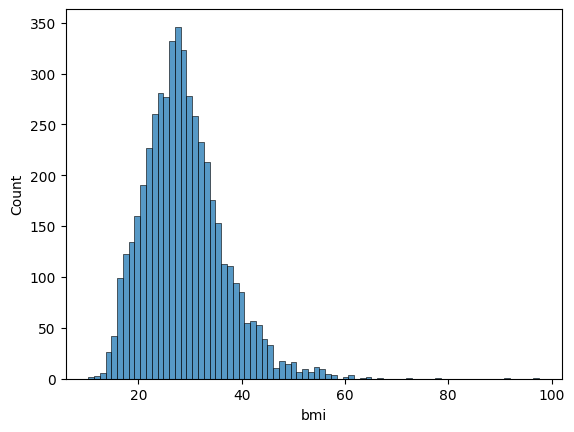

In [5]:
import seaborn as sns

# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

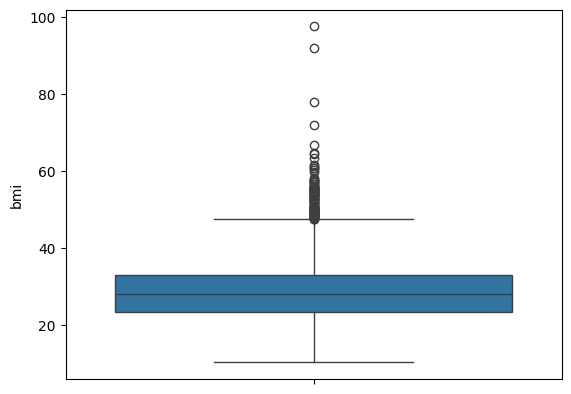

In [6]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi

In [7]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,5000
True,110


* Total outliers in bmi : 110
* Total non-outliers in bmi : 5000





#Handle Missing values

In [8]:
#Look for columns with NA values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
#Fill missing BMI values with median
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [10]:
#confirm the missing values are handled
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#Handle Gender Attribute

In [11]:
#check records in gender column
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


* We have a 'other' gender and since there is only 1 instance we will remove it as to reduce the dimension of gender(Useful when encoding)

<Axes: ylabel='count'>

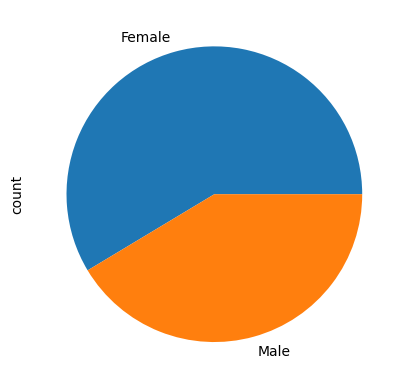

In [12]:
#remove the 'other' gender instance
df['gender']=df['gender'].replace('Other','Female')

#plot the pie chart to see the distribution
df['gender'].value_counts().plot(kind='pie')

### Hyper-tension Analysis

<Axes: xlabel='hypertension'>

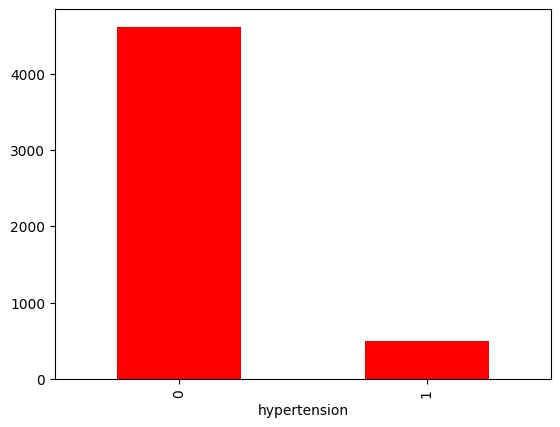

In [13]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

### Work type Analysis

In [14]:
# Value of count of work-type attribute
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<Axes: ylabel='count'>

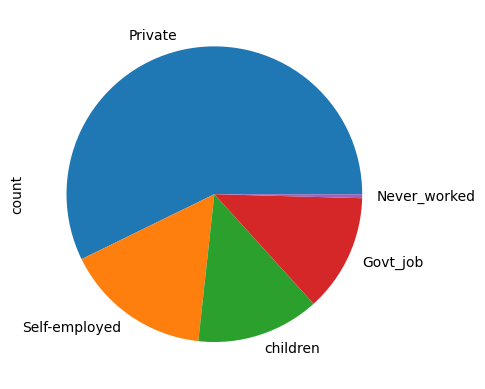

In [15]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

### Smoking status Analysis

In [16]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<Axes: ylabel='count'>

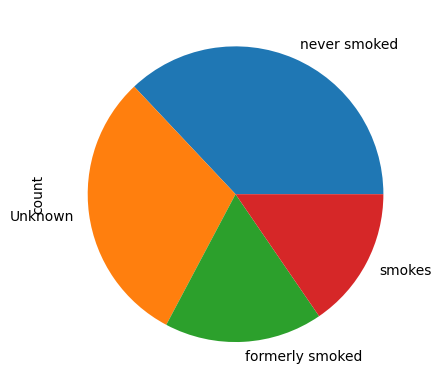

In [17]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

### Residence type Analysis

In [18]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2596
Rural,2514


<Axes: ylabel='count'>

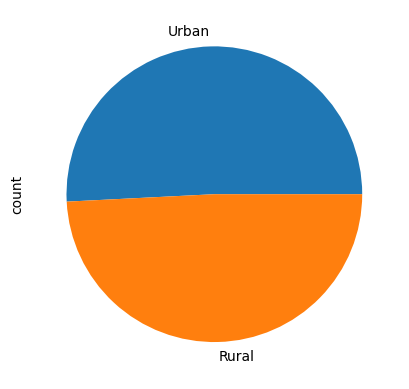

In [19]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

### AGE analysis

<Axes: xlabel='age', ylabel='Count'>

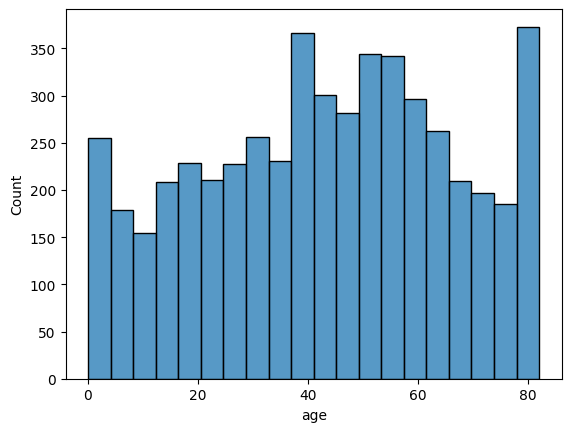

In [20]:
# Graphical representation for the data in age column
#histogram
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

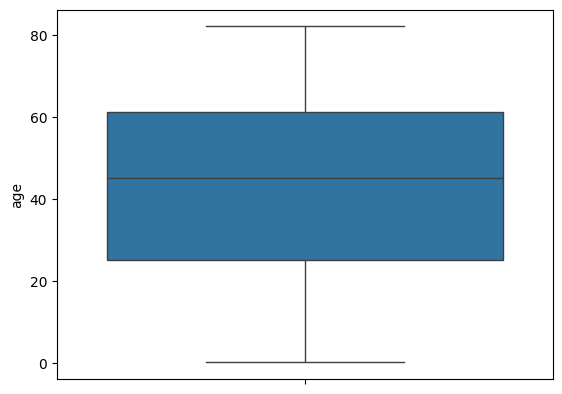

In [21]:
#boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution

### AVERAGE GLUCOSE LEVEL Analysis

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

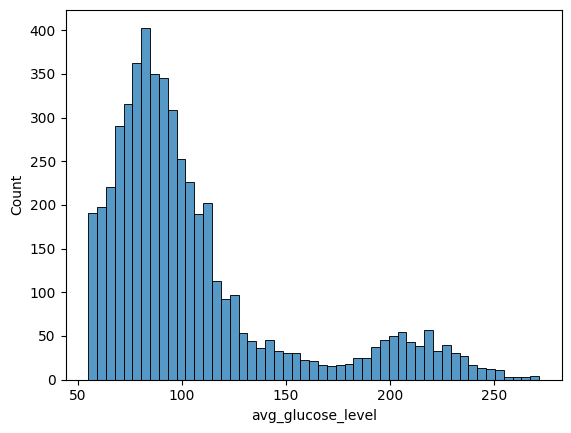

In [22]:
# Graphical representation for the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

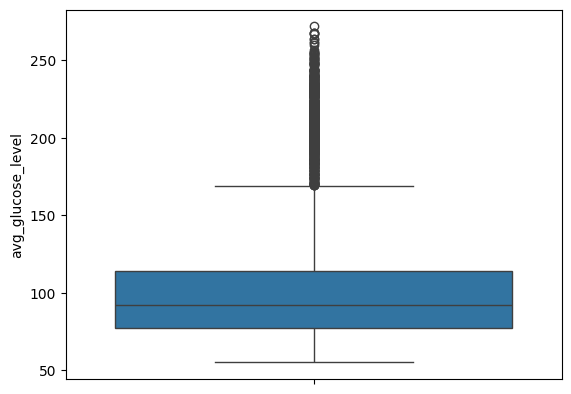

In [23]:
#boxplot
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram
* The data is positively skewed

In [24]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
avg_glucose_level,
False,4483
True,627


* Total outliers in avg_glucose_level : 627
* Total non-outliers in avg_glucose_level : 4483


### Heart_disease analysis

In [25]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

,count
heart_disease,
0,4834
1,276


<Axes: ylabel='count'>

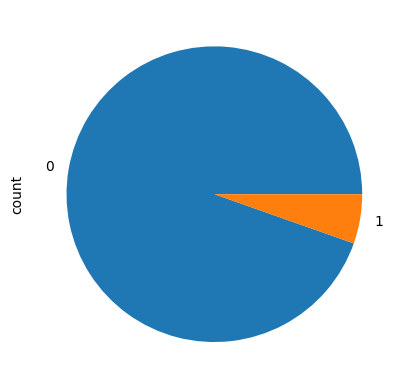

In [26]:
#graphical representation for the data in heart_disease column
df['heart_disease'].value_counts().plot(kind="pie")

### Ever_married analysis

In [27]:
#Value count of evver married attribute
df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


<Axes: ylabel='count'>

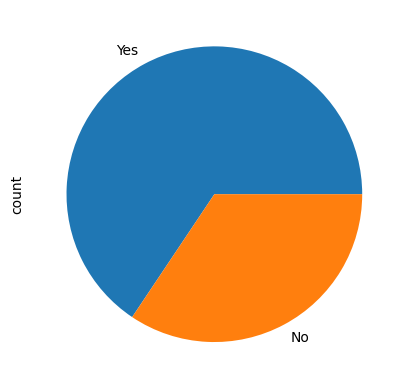

In [28]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

##Heat Map on numerical features

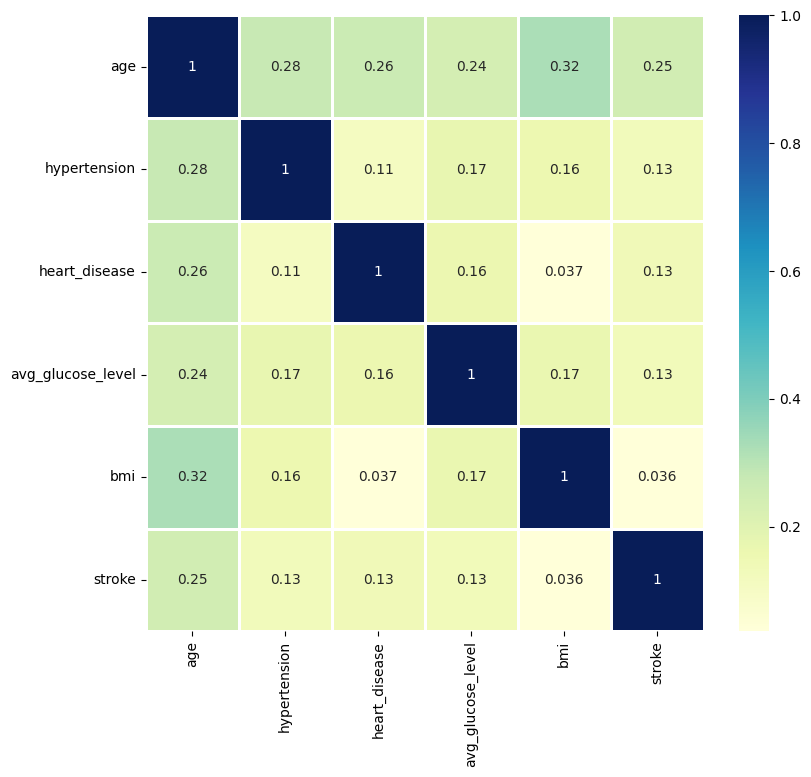

In [29]:
import matplotlib.pyplot as plt


# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat = numerical_df.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidth=0.8, annot=True)
plt.show()

* There is  a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.32
* Rest all correlations were less than 0.32


## Target feature Analysis - Stroke

In [30]:
# Value count in the stroke attribute
df['stroke'].value_counts()

,count
stroke,
0,4861
1,249


<Axes: xlabel='stroke'>

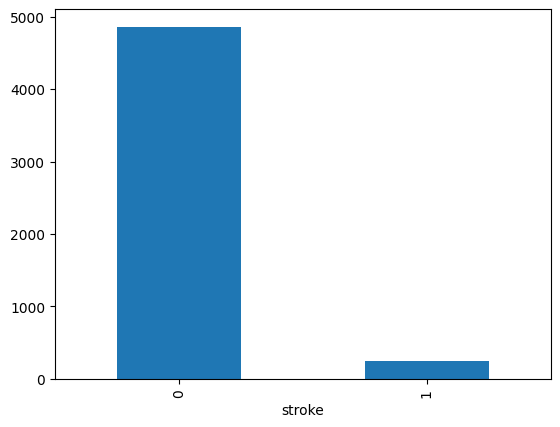

In [31]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar")

#Cross analysis - all the attribute compared with target attibute

<Axes: xlabel='stroke', ylabel='count'>

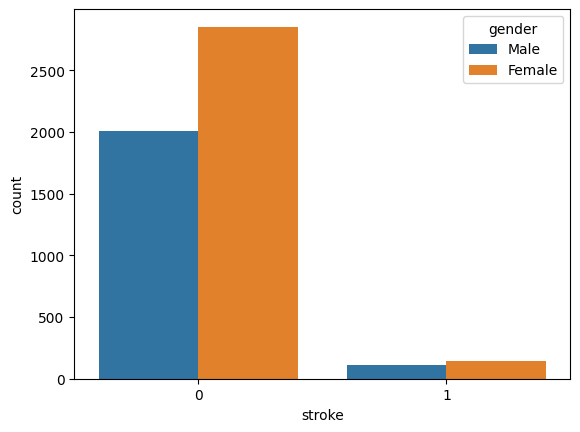

In [32]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

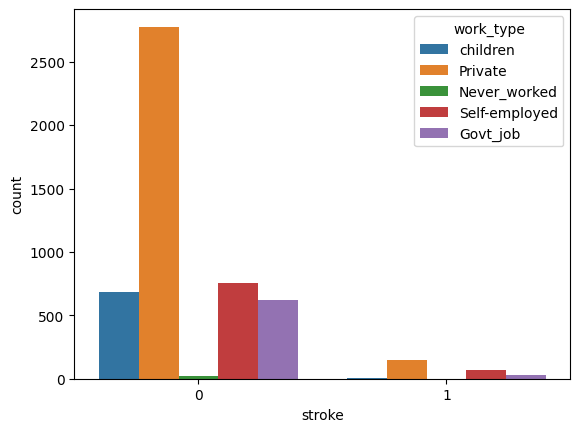

In [33]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

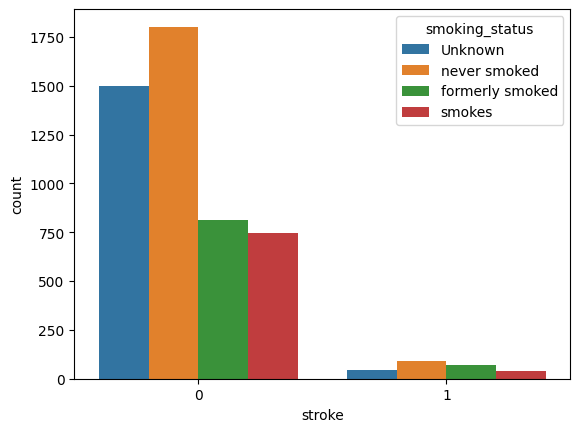

In [34]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

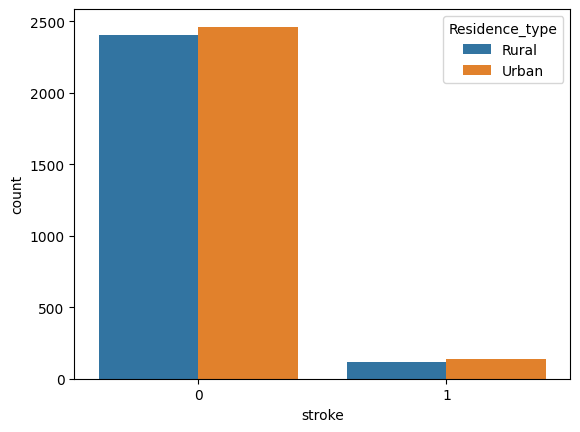

In [35]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

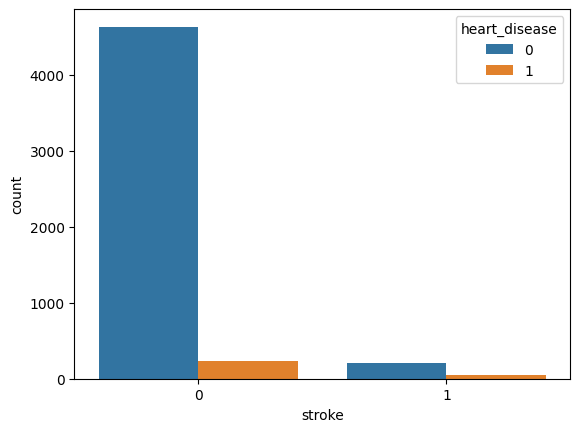

In [36]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

###This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

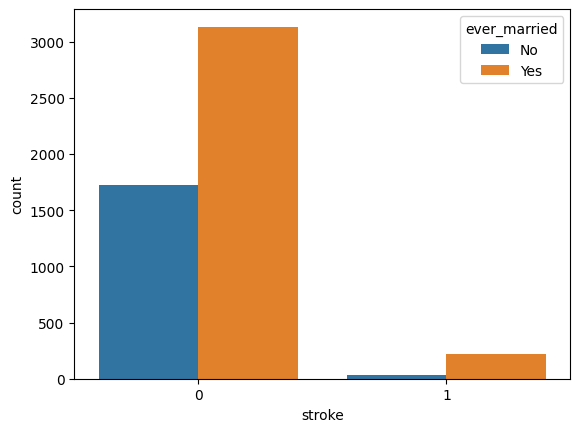

In [37]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

###This shows most of the Married people got Strokes compared to Unmarried people.

#Removing outliers

In [38]:
# Remove outliers in 'bmi' based on IQR
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

df_cleaned = df[~((df['bmi'] < (Q1_bmi - 1.5 * IQR_bmi)) | (df['bmi'] > (Q3_bmi + 1.5 * IQR_bmi)))]

print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_cleaned.shape)

Shape of DataFrame before removing outliers: (5110, 11)
Shape of DataFrame after removing outliers: (4984, 11)


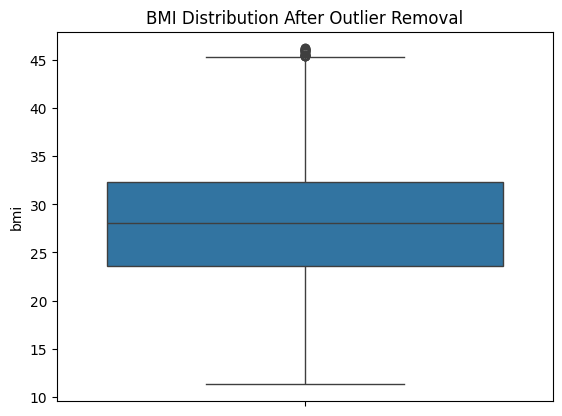

In [39]:
sns.boxplot(data=df_cleaned['bmi'])
plt.title('BMI Distribution After Outlier Removal')
plt.show()

In [40]:
# Remove outliers in 'avg_glucose_level' based on IQR
Q1_avg_glucose_level = df['avg_glucose_level'].quantile(0.25)
Q3_avg_glucose_level = df['avg_glucose_level'].quantile(0.75)
IQR_avg_glucose_level = Q3_avg_glucose_level - Q1_avg_glucose_level

df_cleaned_glucose = df[~((df['avg_glucose_level'] < (Q1_avg_glucose_level - 1.5 * IQR_avg_glucose_level)) | (df['avg_glucose_level'] > (Q3_avg_glucose_level + 1.5 * IQR_avg_glucose_level)))]

print("Shape of DataFrame before removing outliers:", df.shape)
print("Shape of DataFrame after removing outliers:", df_cleaned_glucose.shape)

Shape of DataFrame before removing outliers: (5110, 11)
Shape of DataFrame after removing outliers: (4483, 11)


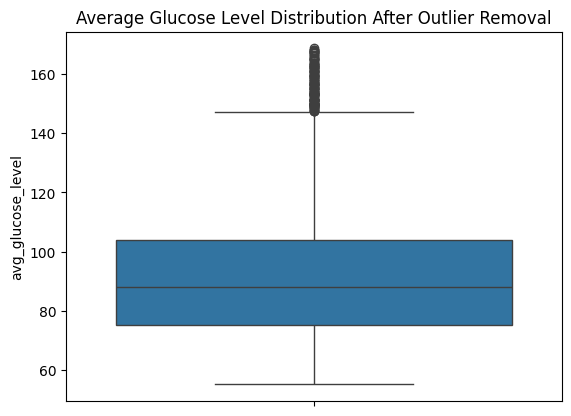

In [41]:
sns.boxplot(data=df_cleaned_glucose['avg_glucose_level'])
plt.title('Average Glucose Level Distribution After Outlier Removal')
plt.show()

#Encode categorical varibales(One Hot Encoding)

In [42]:
# Select categorical columns to encode
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after one-hot encoding:")
display(df.head())

DataFrame after one-hot encoding:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


#Feature engineering (Feature selection and dimension reduction)

## Select features based on importance


Select features with importance scores above a certain threshold.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Instantiate and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
display(sorted_feature_importances)

Feature Importances:


,0
avg_glucose_level,0.282399
age,0.247030
bmi,0.231779
Residence_type_Urban,0.033674
gender_Male,0.030765
hypertension,0.026359
heart_disease,0.024729
smoking_status_never smoked,0.023682
work_type_Private,0.021999
smoking_status_formerly smoked,0.020806


In [44]:
# Set a threshold for feature importance
importance_threshold = 0.01 # You can adjust this threshold

# Select features based on the threshold
selected_features = sorted_feature_importances[sorted_feature_importances > importance_threshold].index.tolist()

print(f"Selected features (importance > {importance_threshold}):")
print(selected_features)

# Create a new DataFrame with only the selected features and the target variable
# Use 'stroke' as the target column as it was not one-hot encoded
if 'stroke' in df.columns:
    df_selected = df[selected_features + ['stroke']]
else:
    print("Error: 'stroke' column not found in the DataFrame.")
    df_selected = None


if df_selected is not None:
    print("\nShape of DataFrame with selected features:", df_selected.shape)
    display(df_selected.head())

Selected features (importance > 0.01):
['avg_glucose_level', 'age', 'bmi', 'Residence_type_Urban', 'gender_Male', 'hypertension', 'heart_disease', 'smoking_status_never smoked', 'work_type_Private', 'smoking_status_formerly smoked', 'ever_married_Yes', 'work_type_Self-employed', 'smoking_status_smokes']

Shape of DataFrame with selected features: (5110, 14)


,avg_glucose_level,age,bmi,Residence_type_Urban,gender_Male,hypertension,heart_disease,smoking_status_never smoked,work_type_Private,smoking_status_formerly smoked,ever_married_Yes,work_type_Self-employed,smoking_status_smokes,stroke
0,228.69,67.0,36.6,True,True,0,1,False,True,True,True,False,False,1
1,202.21,61.0,28.1,False,False,0,0,True,False,False,True,True,False,1
2,105.92,80.0,32.5,False,True,0,1,True,True,False,True,False,False,1
3,171.23,49.0,34.4,True,False,0,0,False,True,False,True,False,True,1
4,174.12,79.0,24.0,False,False,1,0,True,False,False,True,True,False,1


## Consider Dimensionality Reduction with PCA

Apply PCA to the selected features to reduce dimensionality.

Original number of features: 13
Reduced number of features (after PCA): 2


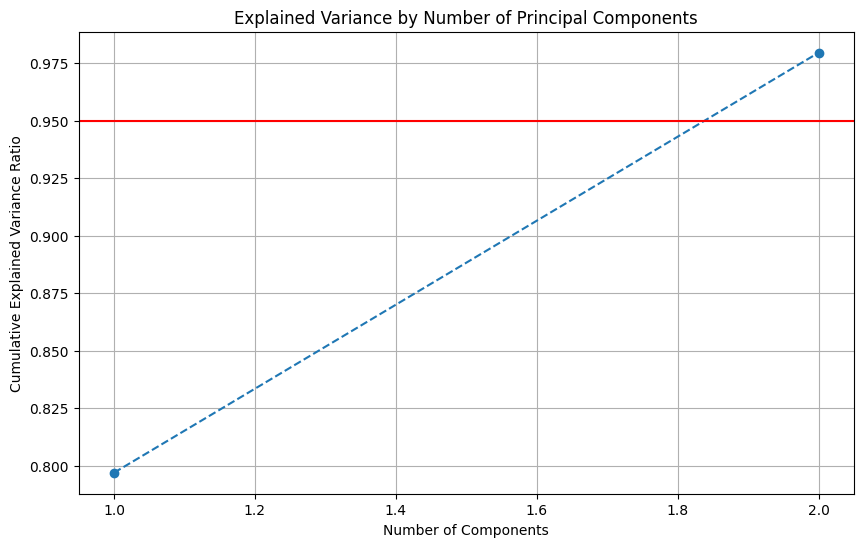

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X_selected = df_selected.drop('stroke', axis=1)
y = df_selected['stroke']

# Apply PCA and keep enough components to explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)

print("Original number of features:", X_selected.shape[1])
print("Reduced number of features (after PCA):", X_pca.shape[1])

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')  # 95% threshold line
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

#Split train/test to apply SMOTE to training set

Split the data into training and testing sets after applying PCA.

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Apply SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)

Shape of X_train before SMOTE: (4088, 2)
Shape of X_train after SMOTE: (7802, 2)
Shape of y_train before SMOTE: (4088,)
Shape of y_train after SMOTE: (7802,)


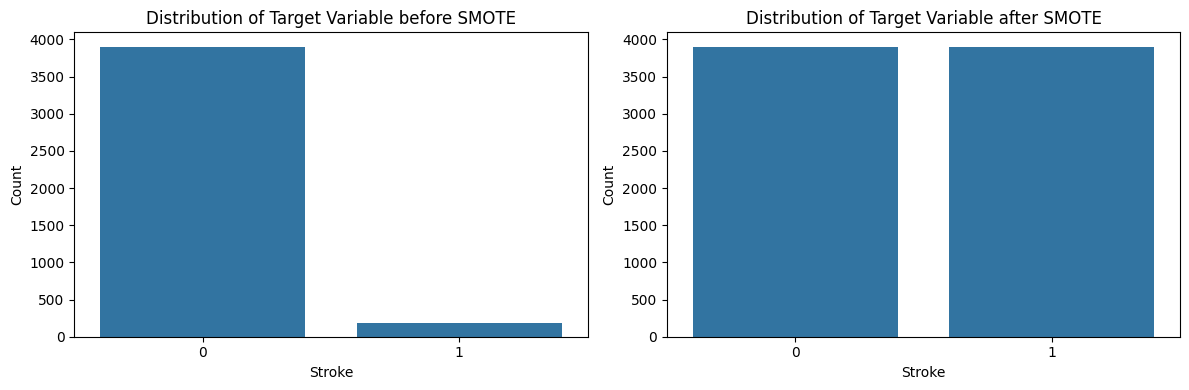

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the target variable before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train) # Visualize before SMOTE
plt.title('Distribution of Target Variable before SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote) # Visualize after SMOTE
plt.title('Distribution of Target Variable after SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##Scaling numeric values

In [49]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

* Since the numeric attributes in the dataset is in different ranges we are usign a scaler to get all the values into the same range.

##Visualize the scaled features

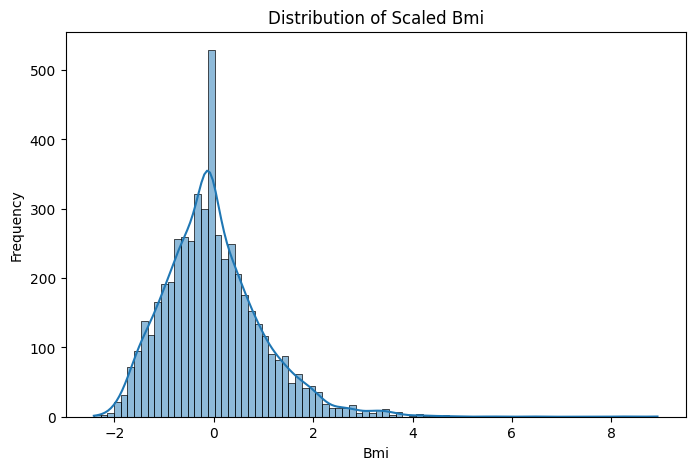

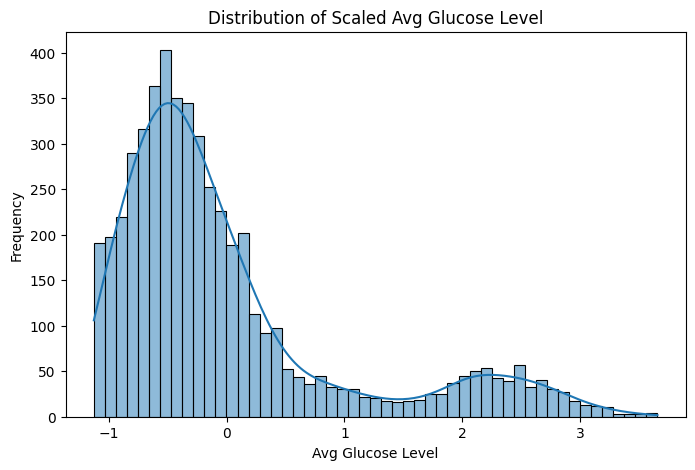

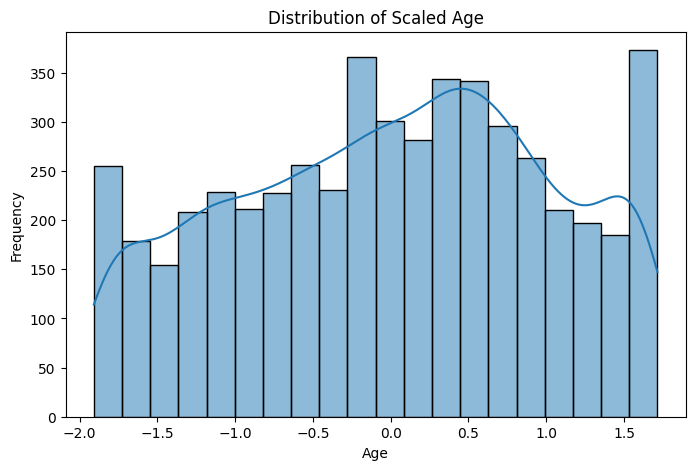

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distributions of scaled numeric columns
scaled_cols = ['bmi', 'avg_glucose_level', 'age']
for col in scaled_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of Scaled {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()

##Save the preprocesed dataset

In [51]:
##from google.colab import drive
##drive.mount('/content/drive')
##df.to_csv("/content/drive/MyDrive/preprocessed_stroke_dataset.csv", index=False)

##Model Training

##LightGBM




In [52]:
from lightgbm import LGBMClassifier
from sklearn import metrics

# Create the classifier object
lgbm_clf = LGBMClassifier()

# Train the model using the training sets
lgbm_clf.fit(X_train, y_train)

# Performing predictions on the test dataset
y_pred_lgbm = lgbm_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880
Accuracy: 0.9324853228962818


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##Cross validation + Hyper parameter tuning

In [53]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# LightGBM classifier with class imbalance handled
lgbm_clf = LGBMClassifier(class_weight='balanced', random_state=0)

# Hyperparameter grid
param_grid = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    lgbm_clf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
best_params_lgbm = grid_search.best_params_

# Train final LightGBM model on full training set
best_lgbm_clf = LGBMClassifier(**best_params_lgbm, class_weight='balanced', random_state=0)
best_lgbm_clf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_lgbm_tuned = best_lgbm_clf.predict(X_test)

# Metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm_tuned)
precision_lgbm = precision_score(y_test, y_pred_lgbm_tuned)
recall_lgbm = recall_score(y_test, y_pred_lgbm_tuned)
f1_lgbm = f1_score(y_test, y_pred_lgbm_tuned)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_lgbm_tuned)

print("LightGBM (Tuned with Class Balance)")
print("Accuracy:", accuracy_lgbm)
print("Precision:", precision_lgbm)
print("Recall:", recall_lgbm)
print("F1-Score:", f1_lgbm)
print("ROC-AUC:", roc_auc_lgbm)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3901, number of negative: 3901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM (Tuned with Class Balance)
Accuracy: 0.8209393346379648
Pre

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
